In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("dfPairedRandom7_corrected.csv")

In [8]:
df.head()

,xInit,yInit,colorInit,xPheno,yPheno,colorPheno
0,3900,100,m,3921.502,234.496,m
1,3100,300,g,3262.151,390.541,g
2,4500,300,g,4548.298,431.992,g
3,2500,500,b,2445.344,583.191,b
4,5700,500,b,5797.403,706.733,b


# Get localities

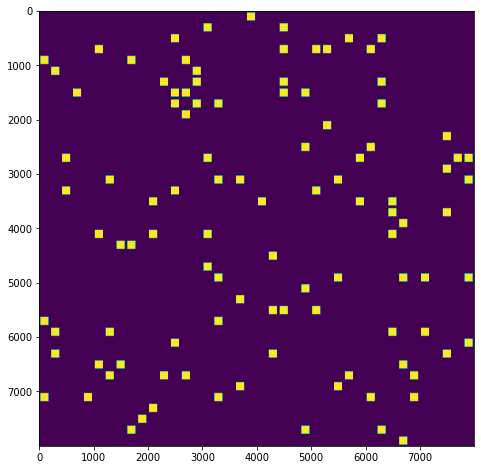

In [41]:
### Reference Image

np.random.seed(7) # set random seed for reproducibility
f = 1/16 
a = np.random.rand(40,40) 
b = np.where(a < f, 1, 0) # binary image

# generate full array, where each pixel is now 1 x 1 micron
cx = []
cy = []
res_lo = np.argwhere(b == 1)
res = res_lo*200+25
im = np.zeros((8000, 8000))
for k in range(res.shape[0]):
    y, x = res[k][0], res[k][1]
    im[y:y+150,x:x+150] = 1
    cx.append(x+75)
    cy.append(y+75)
    
plt.figure(figsize=(8,8))
plt.imshow(im)
plt.show()

In [118]:
x = df.xInit.values
y = df.yInit.values

In [239]:
def getLocalities(x, y, searchLen, normScalar):
    xRange = np.max(x) - np.min(x)
    yRange = np.max(y) - np.min(y)
    maxRange = np.max((xRange, yRange))
    
    normSearchLen = searchLen // normScalar
    xNorm = x // normScalar
    yNorm = y // normScalar
    
    normRange = maxRange // normScalar
    maskDim =  normRange + 4*normSearchLen
    mask = np.zeros((maskDim, maskDim))
    
    centroids = []
    localities = []

    if normScalar == 50:
        # draw 3 by 3 organoids on mask
        for coord in zip(xNorm, yNorm):
            cx = coord[0] + normSearchLen 
            cy = coord[1] + normSearchLen
            centroids.append((cx,cy))
            llx = cx - 1 
            lly = cy - 1
            mask[llx:llx+3, lly:lly+3] = 1
    
    elif normScalar == 200:
        # draw 1 by 1 organoids on mask
        for coord in zip(xNorm, yNorm):
            cx = coord[0] + 2*normSearchLen
            cy = coord[1] + 2*normSearchLen
            centroids.append((cx,cy))
            mask[cx, cy] = 1
            
        # extract localities 
        for c in centroids:
            cx, cy = c[0], c[1]
            locality = mask[cx-normSearchLen: cx+normSearchLen+1, cy-normSearchLen: cy+normSearchLen+1]
            localities.append((locality,cx,cy))
        
    return mask, localities

In [227]:
# 8 degrees of freedom within neighborhood (1x1 organoid)
scaledIm, hi = getLocalities(y, x, 1000, 50)

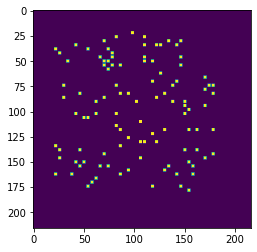

In [228]:
plt.imshow(scaledIm)

In [240]:
# 14 degrees of freedom within neighborhood (3x3 organoid)
scaledIm, nhoods = getLocalities(y, x, 1000, 200)

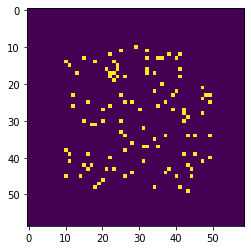

In [241]:
plt.imshow(scaledIm)

In [242]:
nhoods[0]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 10,
 29)

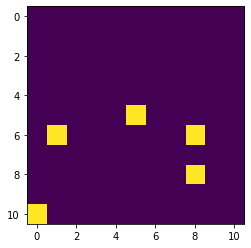

In [243]:
plt.imshow(nhoods[0][0])

In [244]:
nhoods[23]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 17,
 32)

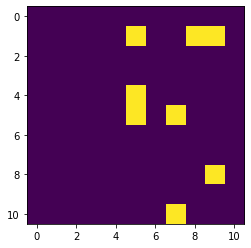

In [245]:
plt.imshow(nhoods[23][0])

In [ ]:
# get rewards

In [17]:
dfRewards = pd.read_csv("exported_metrics_new_random_7.csv")

In [87]:
np.unique(dfRewards.Elongation.values).shape

(73,)

In [19]:
dfRewards.head()

,Dipole,Elongation,Aspect_Ratio,Centroid_x,Centroid_y,Diff_of_means
0,0.033608,118.0,0.866667,4141,3562,0.065538
1,0.008993,21.0,0.937500,4094,945,0.061567
2,0.015581,45.0,0.953488,4069,2577,0.064805
3,0.027595,82.0,0.870370,4050,3295,0.069549
4,0.014851,212.0,0.763158,4052,1055,0.049288


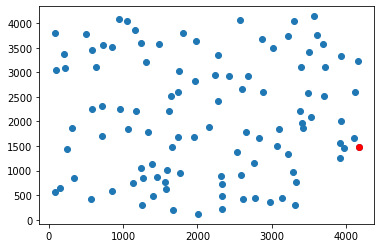

In [79]:
plt.scatter(dfRewards.Centroid_y, dfRewards.Centroid_x)
plt.scatter(dfRewards.Centroid_y[69], dfRewards.Centroid_x[69], c ="red")

In [52]:
RewardCoords = np.array((dfRewards.Centroid_y, dfRewards.Centroid_x)).T

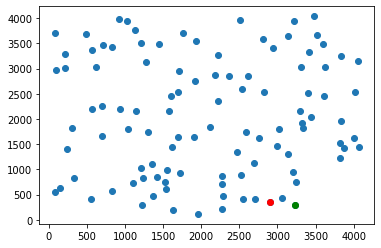

In [82]:
plt.scatter(df.xPheno//2, df.yPheno//2)
plt.scatter(df.xPheno[4]//2, df.yPheno[4]//2, c="red")
plt.scatter(df.xPheno[5]//2, df.yPheno[5]//2, c="green")

In [83]:
OrgCoords = np.array((df.xPheno/2, df.yPheno/2)).T

In [67]:
OrgCoords.shape

(105, 2)

In [66]:
RewardCoords.shape[0] == OrgCoords.shape[0]

True

In [ ]:
arcLengths = []
for i in range(OrgCoords.shape[0]):
    searchVal = OrgCoords[i]
    tile = np.tile(searchVal, (RewardCoords.shape[0],1))
    diffSq = (tile-RewardCoords)**2
    sqrtSum = diffSq.sum(axis = 1)**(0.5)
    ixMin = np.argmin(sqrtSum)
    print(ixMin)
    arcLengths.append(dfRewards.iloc[ixMin, :].Elongation)

In [86]:
len(np.unique(arcLengths))

71

In [75]:
len(np.unique(arcLengths))

32

In [187]:
np.argmin(np.abs(np.tile(df.xPheno.values[0], df.shape[0])-dfRewards.Centroid_y.values))

65

In [175]:
np.argmin(-dfRewards.Centroid_x)

0

In [ ]:
df

In [189]:
dfRewards.Centroid_y.values[65]

3921

In [202]:
nhoods

[(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
  5,
  24),
 (array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0

In [206]:
x//200 + 5, y//200 + 5

(array([24, 20, 27, 17, 33, 36, 10, 27, 30, 31, 35,  5, 13, 18,  6, 19, 16,
        19, 27, 36,  8, 17, 18, 27, 29, 17, 19, 21, 36, 18, 31, 42, 29, 35,
         7, 20, 34, 43, 44, 42, 11, 21, 23, 32, 44,  7, 17, 30, 15, 25, 34,
        37, 37, 42, 38, 10, 15, 20, 37, 12, 13, 26, 20, 21, 32, 38, 40, 44,
        29, 23, 26, 27, 30,  5, 21,  6, 11, 37, 40, 17, 44,  6, 26, 42, 10,
        12, 38, 11, 16, 18, 33, 39, 23, 32,  5,  9, 21, 35, 39, 15, 14, 13,
        29, 36, 38]),
 array([ 5,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 11,
        11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 15, 16, 17, 17,
        18, 18, 18, 18, 18, 19, 20, 20, 20, 20, 20, 21, 21, 21, 22, 22, 22,
        22, 23, 23, 24, 25, 25, 25, 25, 26, 26, 27, 28, 29, 29, 29, 29, 29,
        30, 31, 32, 32, 32, 33, 33, 34, 34, 34, 34, 35, 35, 36, 36, 36, 37,
        37, 37, 38, 38, 38, 38, 38, 39, 39, 40, 40, 40, 40, 40, 41, 42, 43,
        43, 43, 44]))

# make dataset

In [246]:
data = []
for i in range(len(nhoods)):
    mat = nhoods[i][0]
    matVec = mat.flatten()
    arc = arcLengths[i]
    hstacked = np.hstack((matVec, arc))
    data.append(hstacked)

In [251]:
nbrsRewards = np.vstack(data)

In [252]:
np.save('OrganoidLocalities_random7', nbrsRewards)

In [253]:
df = np.load('OrganoidLocalities_random7.npy')

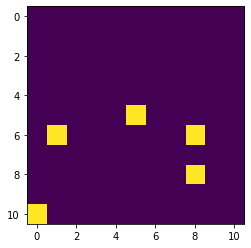

In [258]:
plt.imshow(df[0][:-1].reshape(11,11))